In [2]:
# Read libraries

# Data wrangling
import pandas as pd
import numpy as np
import re

# Visualization 
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Machine learning 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
df_2022 = pd.read_csv('/Users/albertcortbanke/Downloads/thesis_missing_data_2023/hfi/hfi_cc_2022.csv')

What can the Human Freedom Score measure, and more importantly, what is it unable to measure?
What attributes are the most important to explore missingness within? (I.e what attributes correlate highly, and would be pointless to measure within)

Spatial, and temporal missingness. How do we address this with spatial models and temporal accountance?


In [9]:
df_2022

,year,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol_vdem,...,ef_regulation_business_adm,ef_regulation_business_burden,ef_regulation_business_start,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2020,Albania,Eastern Europe,7.67,47.0,2.0,5.903741,4.725831,4.047825,7.194198,...,5.651538,6.000000,9.742477,5.9975,5.621940,7.175250,6.698118,7.112958,7.64,26.0
1,2020,Algeria,Middle East & North Africa,5.13,154.0,4.0,4.913311,5.503872,4.254187,5.461189,...,4.215154,2.222222,9.305002,2.5775,8.771111,7.029528,5.686753,5.778953,5.12,157.0
2,2020,Angola,Sub-Saharan Africa,5.97,122.0,3.0,2.773262,4.352009,3.478950,5.306695,...,2.937894,3.111111,8.730805,4.7025,7.916416,6.782923,5.696942,6.227545,5.91,138.0
3,2020,Argentina,Latin America & the Caribbean,6.99,74.0,2.0,6.824288,5.679943,4.218635,6.748978,...,2.714233,5.555556,9.579288,7.2675,5.726521,6.508295,6.225232,5.490538,4.87,161.0
4,2020,Armenia,Caucasus & Central Asia,8.14,26.0,1.0,NaN,NaN,NaN,7.204175,...,5.170406,5.111111,9.863530,6.2600,9.302574,7.040738,7.124727,7.756333,7.84,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,2000,"Venezuela, RB",Latin America & the Caribbean,6.43,86.0,3.0,NaN,NaN,NaN,5.902894,...,6.417950,6.150000,6.268547,4.3100,NaN,0.315142,4.692328,5.531397,5.92,87.0
3461,2000,Vietnam,South Asia,5.51,113.0,4.0,NaN,NaN,NaN,4.765274,...,NaN,NaN,7.885638,3.7000,NaN,0.000000,3.861879,4.416768,5.58,105.0
3462,2000,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,3.886318,...,NaN,NaN,NaN,1.1450,NaN,NaN,NaN,NaN,NaN,NaN
3463,2000,Zambia,Sub-Saharan Africa,7.03,72.0,3.0,NaN,NaN,NaN,6.087703,...,NaN,NaN,8.537578,7.0050,NaN,8.520369,8.020982,6.799421,7.04,43.0


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

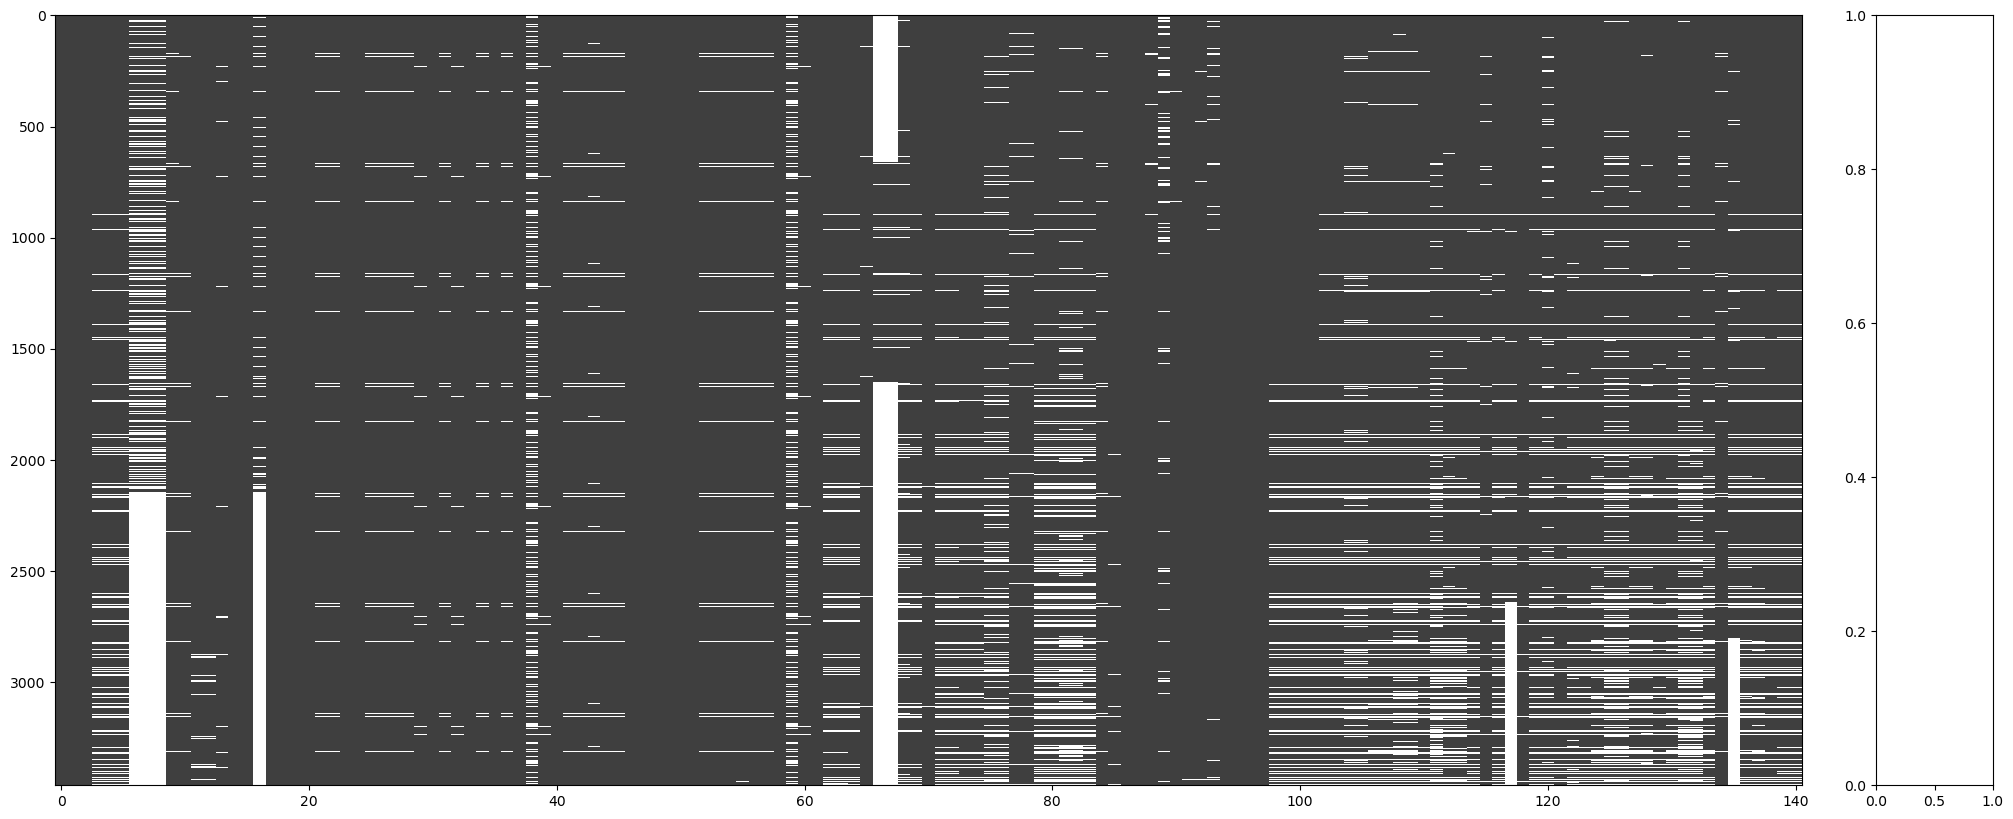

In [10]:
msno.matrix(df_2022)

In [18]:
df_copy = df_2022.isna().sum()

df_copy = pd.DataFrame(df_copy, columns=['na_count'])

In [29]:
df_copy.sort_values(by='na_count', ascending=False).head(60)

,na_count
pf_identity_inheritance_daughters,2548
pf_identity_inheritance_widows,2548
pf_rol_criminal,2075
pf_rol_procedural,2075
pf_rol_civil,2075
pf_ss_disappearances_organized,1494
ef_trade_movement_visit,1000
pf_expression_bti,970
pf_assembly_freedom_bti,970
ef_regulation_business_licensing,934
